In [8]:
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

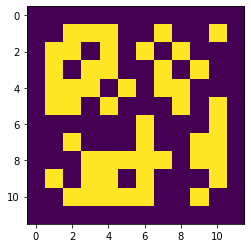

In [6]:
X = imread('X.bmp')
X = (X>10).astype(int)
plt.imshow(X)

In [19]:
X

Array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
mask = np.array([[0,0,0],
                 [0,1,4],
                 [0,2,8]])

conv = convolve2d(X, mask, mode='same')
print(conv)

[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  5  5  4  0  1  4  0  1  4]
 [ 0  1  7 14 11 12  1  6  9  4  2  8]
 [ 0  3 14  9  7 12  2  9  6  9  4  0]
 [ 0  3 13  7 14  9  4  3 13  6  8  0]
 [ 0  3 15 14  9  6  8  2 11 12  1  4]
 [ 0  2 10  8  2  8  1  4  2  8  3 12]
 [ 0  0  1  4  0  0  3 12  0  1  7 12]
 [ 0  0  2  9  5  5  7 13  4  3 15 12]
 [ 0  1  4  3 15 14 11 14  8  2 11 12]
 [ 0  2  9  7 15 13  7 12  0  1  6  8]
 [ 0  0  2 10 10 10 10  8  0  2  8  0]]


<BarContainer object of 16 artists>

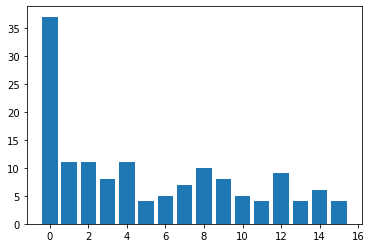

In [17]:
x_axis = np.arange(0,17,1)

h, x = np.histogram(conv[:], bins=x_axis)

plt.bar(x[0:-1], h)

In [33]:
h

array([37, 11, 11,  8, 11,  4,  5,  7, 10,  8,  5,  4,  9,  4,  6,  4],
      dtype=int64)

In [36]:
arr_f_intra = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
arr_e_intra = [0, 2, 1, 2, 1, 2, 2, 2 ,0, 2, 1, 2, 1, 2, 2, 2]
arr_v_intra = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

arr_f_inter = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
arr_e_inter = [0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2]
arr_v_inter = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [40]:
v_intra = arr_v_intra@h

e_intra = arr_e_intra@h

f_intra = arr_f_intra@h

print("intra :\nv_intra = %d\ne_intra = %d\nf_intra = %d"%(v_intra, e_intra , f_intra))

print()

v_inter = arr_v_inter@h

e_inter = arr_e_inter@h

f_inter = arr_f_inter@h

print("inter :\nv_inter = %d\ne_inter = %d\nf_inter = %d"%(v_inter, e_inter , f_inter))

A  = f_intra
P  = -4*f_intra + 2*e_intra
χ8 = v_intra - e_intra + f_intra
χ4 = v_inter - e_inter + f_inter

print()

print("A  = %d\nP  = %d\nχ8 = %d\nχ4 = %d"%(A, P , χ8, χ4))


intra :
v_intra = 107
e_intra = 158
f_intra = 50

inter :
v_inter = 50
e_inter = 42
f_inter = 4

A  = 50
P  = 116
χ8 = -1
χ4 = 12


In [51]:
from numpy import sqrt
# Crofton

P4 = [0, np.pi/2, 0, 0, 0, np.pi/2, 0, 0, np.pi/2, np.pi, 0, 0 , np.pi/2, np.pi, 0, 0]
P8 = [0, (np.pi/4)*(1+(1/np.sqrt(2))), (np.pi/(4*sqrt(2))), (np.pi/(2*sqrt(2))), 0, 
     (np.pi/4)*(1+(1/np.sqrt(2))), 0, (np.pi/(4*sqrt(2))), np.pi/4, np.pi/2, 
     (np.pi/(4*sqrt(2))), (np.pi/(4*np.sqrt(2))), np.pi/4, np.pi/2, 0, 0]

hP4 = h@P4
hP8 = h@P8

print("P4 : %f\nP8 : %f" % (hP4, hP8))

P4 : 91.106187
P8 : 77.763995
